# CS178 Final Project
## IMDB Reviews dataset
### Students:
Rebecca Park : 50269810\
Nick Hosun Song : 65482420

In [3]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, vstack
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix
## conda install libsvm
## conda install libsvm-python
from libsvm.svmutil import svm_train, svm_predict, svm_problem, svm_parameter , svm_read_problem



In [4]:
#Load the vocab from given data will correlate to bagofwords(feat) file
def load_vocab(vocab_file):
    with open(vocab_file, 'r',encoding ='utf-8') as file:
        vocab = file.read().splitlines()
    return {index: word for index, word in enumerate(vocab)}
#convert data from svm_read_problem into csr to se for logistic regression
#format for csr [data] , [indices], [indexptr]
def convert_to_csr(data, num_features):
    row_ind = []
    col_ind = []
    data_values = []

    for i, row in enumerate(data):
        for j, value in row.items():
            row_ind.append(i)
            col_ind.append(j)
            data_values.append(value)

    csr_data = csr_matrix((data_values, (row_ind, col_ind)), shape=(len(data), num_features))
    return csr_data
    
vocab = load_vocab('imdb.vocab')

# Format of libsvm files : <label> { (feature index from imdb.vocab) : (appears this many times in review) ... }
y_train, X_train = svm_read_problem('train/labeledBow.feat')
y_test, X_test = svm_read_problem('test/labeledBow.feat')

num_features = len(vocab)

X_train_csr = convert_to_csr(X_train,num_features)
X_test_csr = convert_to_csr(X_test,num_features)

# 1 ( 7, 8 , 9 ,10)  for positive reviews, 0 (1,2,3,4) for negative reviews
y_train_bin = [1 if y > 6 else 0 for y in y_train]
y_test_bin = [1 if y > 6 else 0 for y in y_test] 

log_reg_model = LogisticRegression(max_iter=5000)
log_reg_model.fit(X_train_csr,y_train_bin)

y_pred = log_reg_model.predict(X_test_csr)
print("Accuracy:",accuracy_score(y_test_bin,y_pred))
print("Classification Report:\n", classification_report(y_test_bin,y_pred))


Accuracy: 0.86768
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



Min sample split: 10
Min sample split: 30
Min sample split: 50
Min sample split: 80
Min sample split: 100
Min sample split: 150
Min sample split: 200
Min sample split: 300
Min sample split: 400
Min sample split: 500
Min sample split: 600
Min sample split: 700
Min sample split: 800


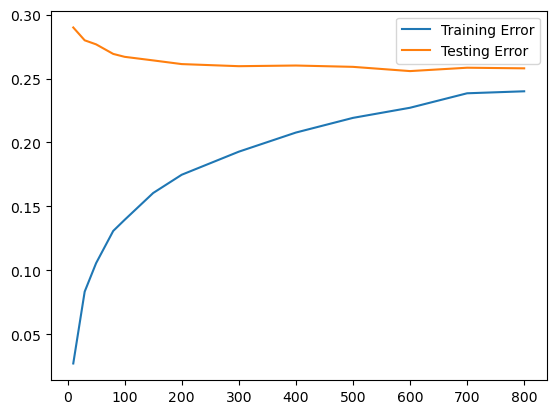

In [12]:
train_error = []
test_error = []
min_sample_split_options = [10,30,50,80,100,150,200,300,400,500,600,700,800]


#just trying to see which min_sample_split is best
#maybe we shoud try ensembles too?
for min_sample_split in min_sample_split_options:
    dec_tree_model = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_sample_split)
    dec_tree_model.fit(X_train_csr,y_train_bin)

    dec_Tree_train_pred = dec_tree_model.predict(X_train_csr)
    dec_Tree_test_pred = dec_tree_model.predict(X_test_csr)

    #keeping track of how far we are because this takes forever to run
    print(f"Min sample split: {min_sample_split}")
    
    #print("Accuracy (Training):",accuracy_score(y_train_bin,dec_Tree_train_pred))
    #print("Classification Report (Training):\n", classification_report(y_train_bin,dec_Tree_train_pred))
    #print("Accuracy (Testing):",accuracy_score(y_test_bin,dec_Tree_test_pred))
    #print("Classification Report (Testing):\n", classification_report(y_test_bin,dec_Tree_test_pred))
    
    train_error.append(zero_one_loss(dec_Tree_train_pred,y_train_bin))
    test_error.append(zero_one_loss(dec_Tree_test_pred,y_test_bin))
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(min_sample_split_options, train_error)
ax.plot(min_sample_split_options, test_error)
plt.legend(['Training Error','Testing Error'])
plt.show()